In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from PIL import Image, ImageDraw


In [4]:
import json

In [5]:
jsonFilePath = "../keypoint_train_annotations_20170902.json"

with open(jsonFilePath, "r") as f:
    jsonData = json.loads(f.read())

In [ ]:
def sortByFileName(jsonData):
    newData = {}
    for dataSet in jsonData:
        newData[dataSet["image_id"]] = dataSet
    return newData

In [7]:
import pickle
save_path = "../model_res/keypoint_annotation.pkl"

In [ ]:

with open(save_path, mode="wb") as f:
    pickle.dump(sortByFileName(jsonData), f)

In [8]:
with open(save_path, mode="rb") as f:
    new_data = pickle.load(f)

In [10]:
test_image = "b93f04bb7831d5803dae376464a39892818d69f1"

In [11]:
notation_data = new_data[test_image]

In [12]:
for humman_data in notation_data["human_annotations"]:
    print(humman_data)

human2
human1


In [13]:
filePattern = "../keypoint_train_images_20170902/{}.jpg"
def DrawImage(fileName, annotation_data):
    fileSource = filePattern.format(fileName)
    avatar = Image.open(fileSource)
    drawAvatar = ImageDraw.Draw(avatar)
    draw_human_boundary(drawAvatar, annotation_data)
    draw_keypoint(drawAvatar, annotation_data)
    del drawAvatar
    return avatar

def draw_human_boundary(drawAvatar, annotation_data):
    if 'human_annotations' in annotation_data:
        human_data_set = annotation_data['human_annotations']
        for humman_data in human_data_set:
            drawAvatar.rectangle(human_data_set[humman_data], outline=(255, 10, 0))
            
def draw_keypoint(drawAvatar, annotation_data):
    if "keypoint_annotations" in annotation_data:
        keypoint_data_set = annotation_data["keypoint_annotations"]
        for keypoint_key in keypoint_data_set:
            points = keypoint_data_set[keypoint_key]
            for i in range(0, len(points), 3):
                if points[i+2] == 1:
                    fill = (10, 255, 10)
                elif points[i+2] == 2:
                    fill = (255, 10, 10)
                else:
                    fill = None
                if fill is not None:
                    arc_points = [points[i] - 3, points[i+1] - 3, points[i] + 3, points[i+1] + 3]
                    drawAvatar.arc(arc_points, start=0, end=360, fill=fill)
                    drawAvatar.text((points[i]+10, points[i+1]), "{}".format((i // 3)+1), fill=fill)

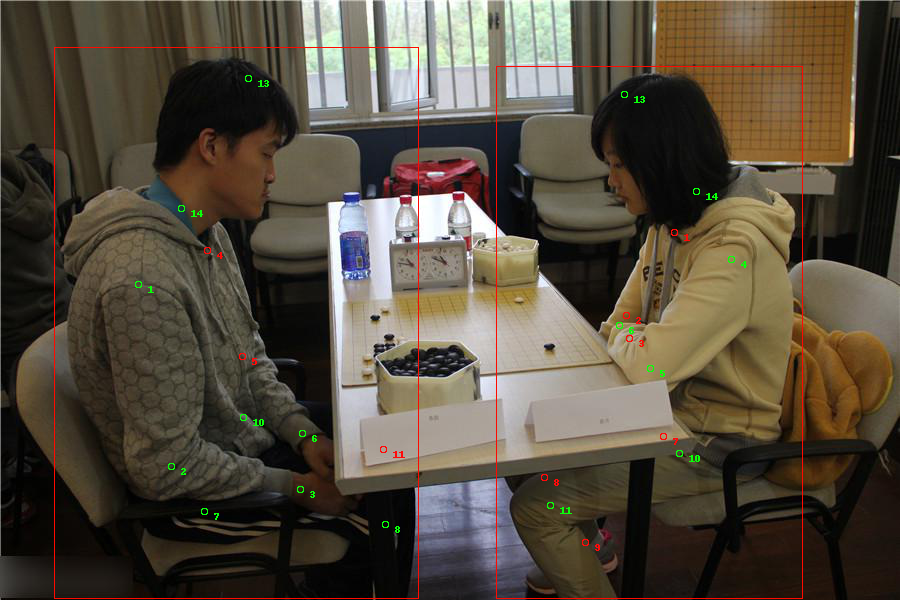

In [14]:
DrawImage(test_image, notation_data)

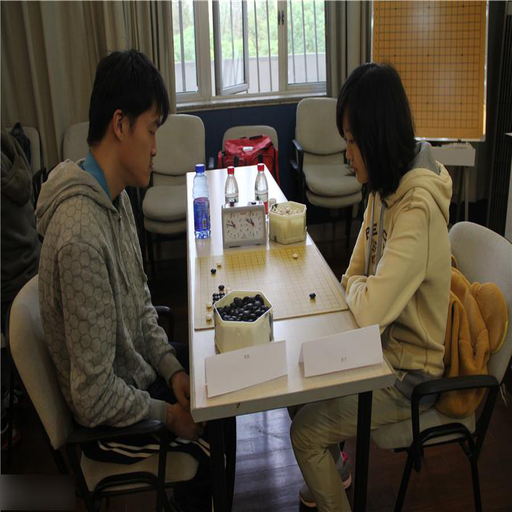

In [17]:
def resize_img(fileName, new_size=[512, 512]):
    fileSource = filePattern.format(fileName)
    avatar = Image.open(fileSource)
    return avatar.resize(new_size, Image.ANTIALIAS)

resize_img(test_image)